In [42]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib
import h5py as h5

import os
import codecs
import imageio

def read_dim_fromfile(name):
    file = h5.File(name, "r")
    Nx = int(file.get("LBE3D").attrs["lbe_sx"][0])
    Ny = int(file.get("LBE3D").attrs["lbe_sy"][0])
    Nz = int(file.get("LBE3D").attrs["lbe_sz"][0])
    dt = int(file.get("LBE3D").attrs["lbe_diag_nsteps"][0])
    t  = int(file.get("LBE3D").attrs["lbe_steps"][0])
    steps = int(t / dt)
    print(Nx,Ny,Nz)
    return Nx,Ny,Nz,t,dt,steps
    file.close()

def read_field_fromfile(name, field):
    file = h5.File(name, "r")
    f = np.zeros((Nz,Ny,Nx))
    name_field="/LBE3D/"+field
    f[:,:,:] = file.get(str(name_field))[...]
    file.close()
    return f

SAVE = False
direc = "/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/"

#name=direc+"flag.h5"
name=direc+"density_t.0.h5"
Nx,Ny,Nz,tf,dt,steps = read_dim_fromfile(name)

if (0):
    tf=3000
    dt=500    
    steps = int(tf / dt)

rho1 = np.zeros((steps,Nz,Ny,Nx))
#rho2 = np.zeros((steps,Nz,Ny,Nx))
vx = np.zeros((steps,Nz,Ny,Nx))
vy = np.zeros((steps,Nz,Ny,Nx))
vz = np.zeros((steps,Nz,Ny,Nx))

for i in range(0,steps):
    t = i*dt
    name=direc+"density_t.%d.h5"%t
    print(name)
    rho1[i,:,:,:] = read_field_fromfile(name,"rho1")
    #rho2[i,:,:,:] = read_field_fromfile(name,"rho2")
    name=direc+"velocity_t.%d.h5"%t
    vx[i,:,:,:] = read_field_fromfile(name,"vx")
    vy[i,:,:,:] = read_field_fromfile(name,"vy")
    vz[i,:,:,:] = read_field_fromfile(name,"vz")

'''
flaggeometry = read_field_fromfile(name, "flag")
name=direc+"flag_geo.h5"
flag = read_field_fromfile(name, "flag")
name=direc+"density_CG_t.0.h5"
rhoN0 = read_field_fromfile(name, "rhoN")
name=direc+"density_CG_t.1.h5"
rhoN1 = read_field_fromfile(name, "rhoN")
name=direc+"density_CG_t.2.h5"
rhoN2 = read_field_fromfile(name, "rhoN")
'''

32 32 32
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.0.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.1.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.2.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.3.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.4.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.5.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.6.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.7.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.8.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.9.h5
/home/matti/programming/lbe-direct/src/tests/mattia_ivan_mayonese_test/RUN/density_t.10.h5


'\nflaggeometry = read_field_fromfile(name, "flag")\nname=direc+"flag_geo.h5"\nflag = read_field_fromfile(name, "flag")\nname=direc+"density_CG_t.0.h5"\nrhoN0 = read_field_fromfile(name, "rhoN")\nname=direc+"density_CG_t.1.h5"\nrhoN1 = read_field_fromfile(name, "rhoN")\nname=direc+"density_CG_t.2.h5"\nrhoN2 = read_field_fromfile(name, "rhoN")\n'

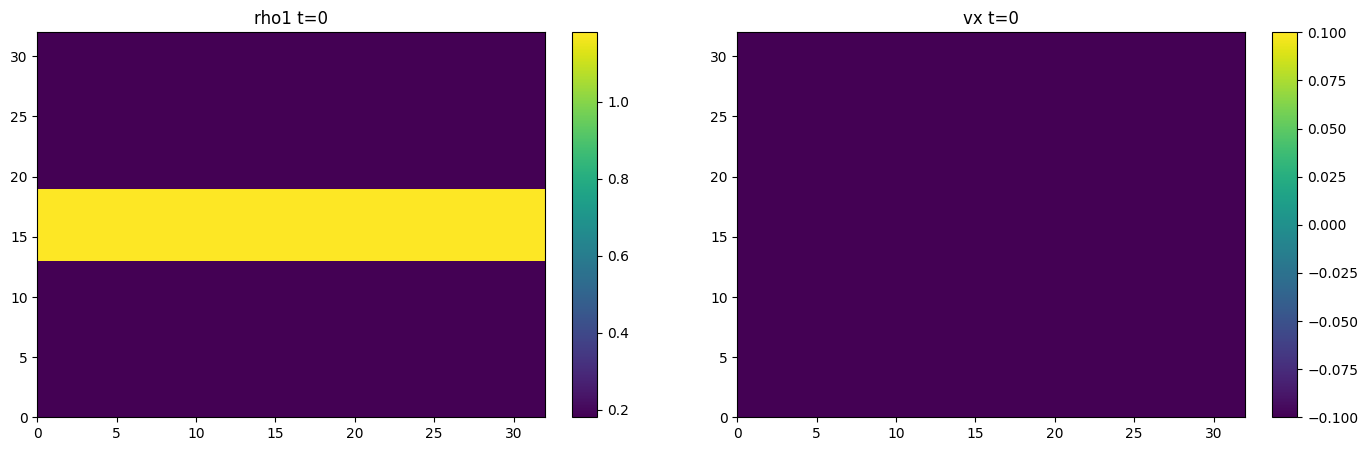

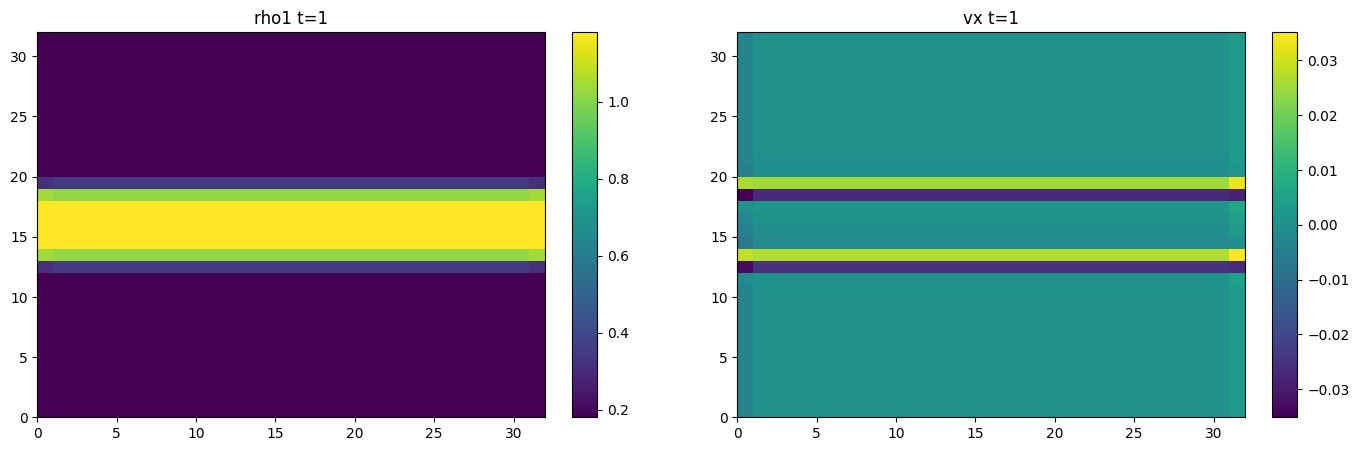

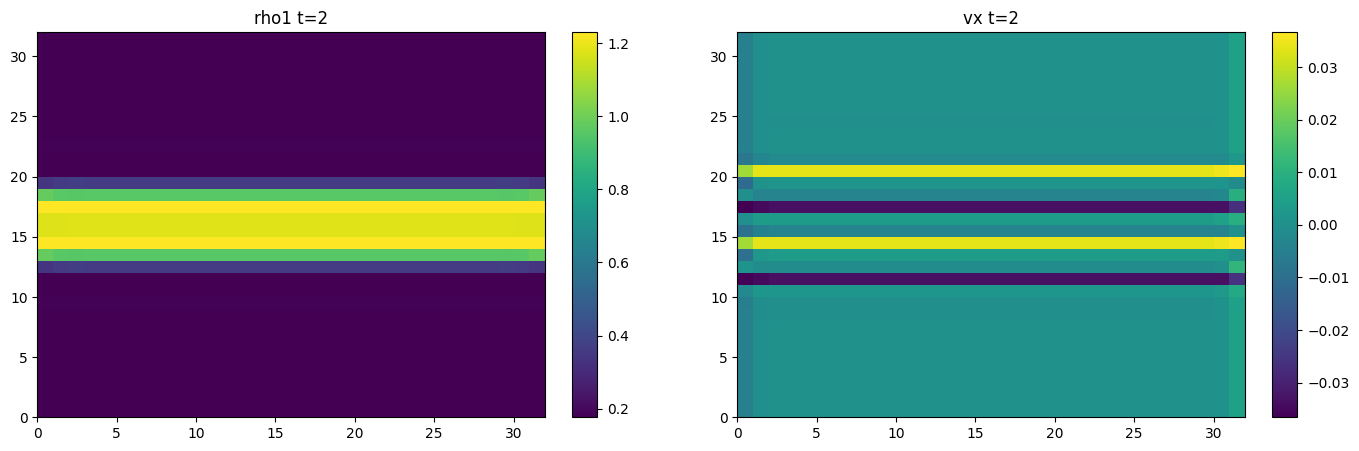

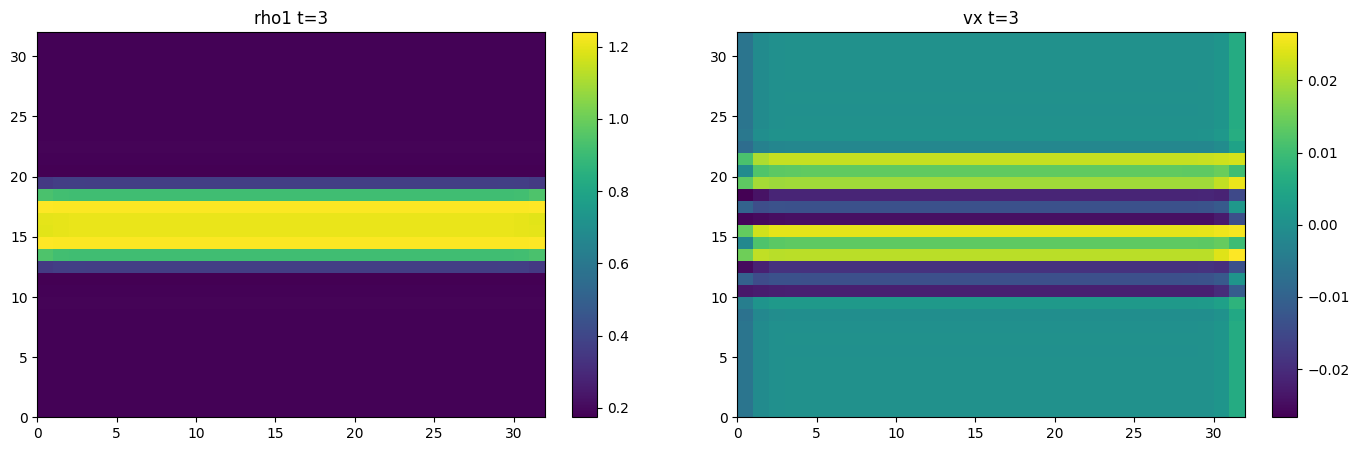

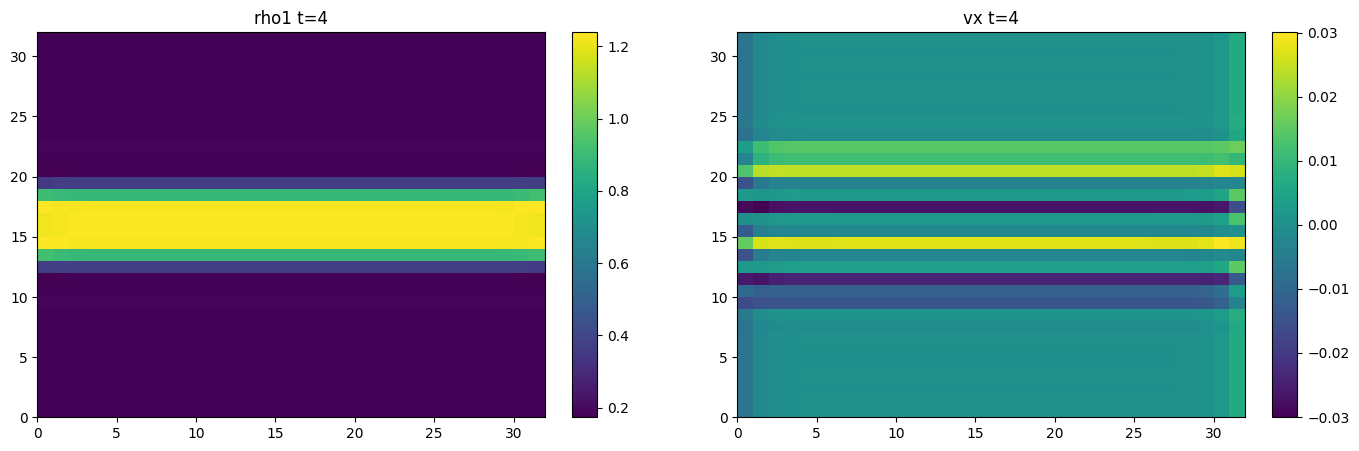

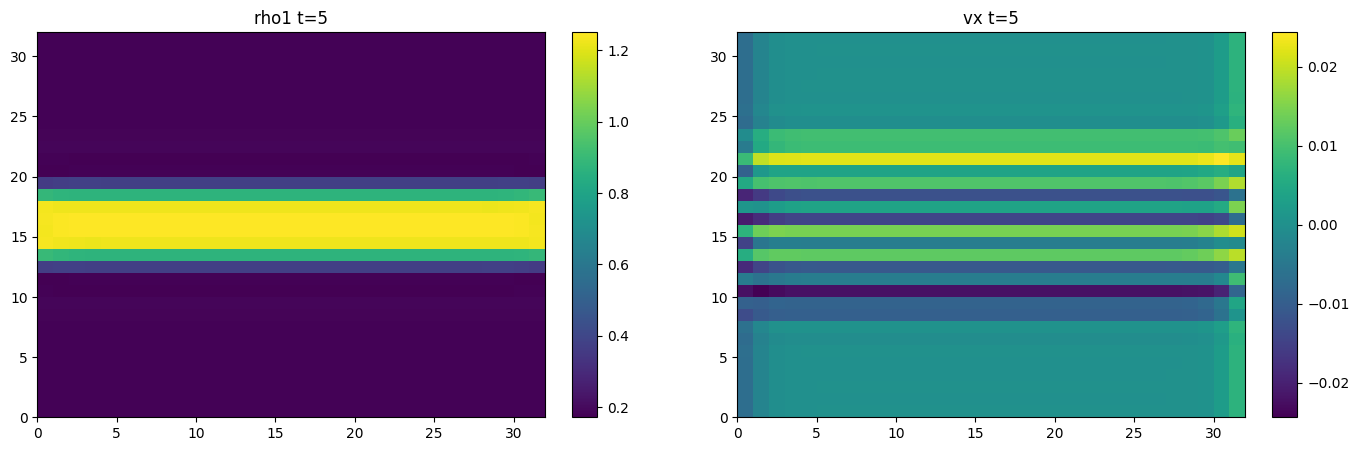

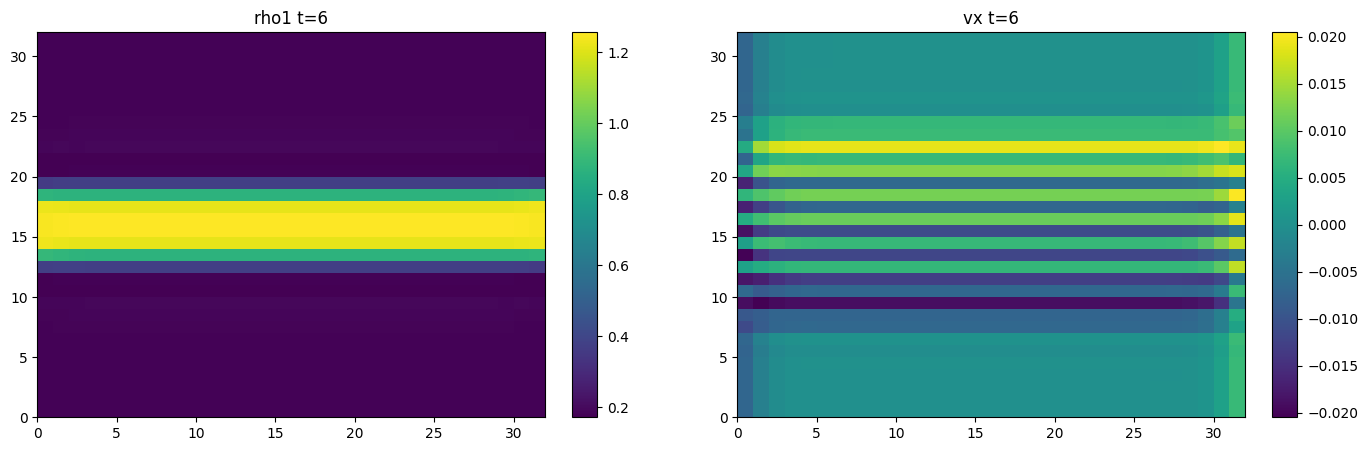

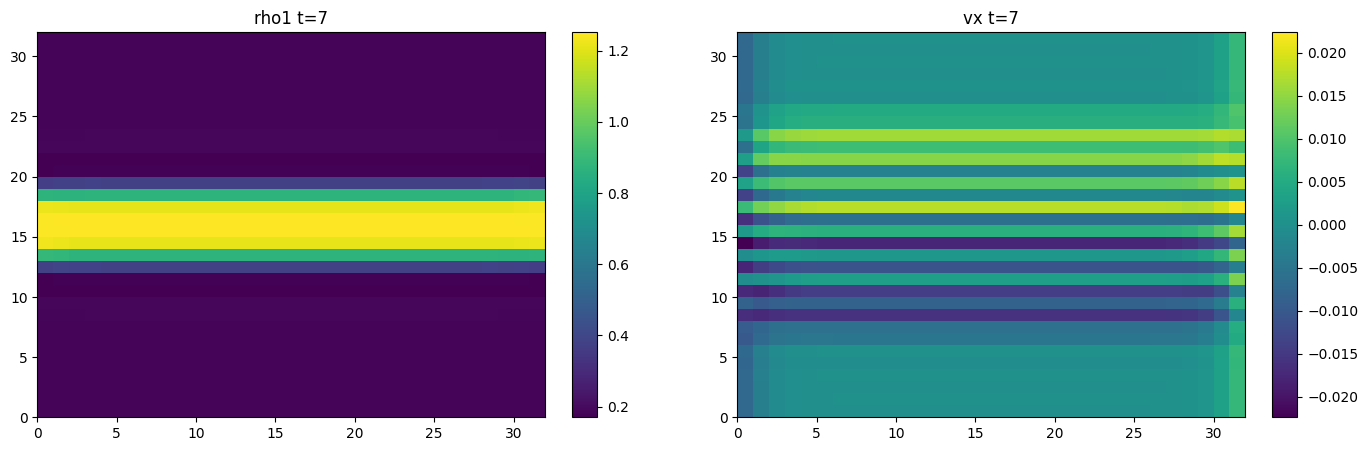

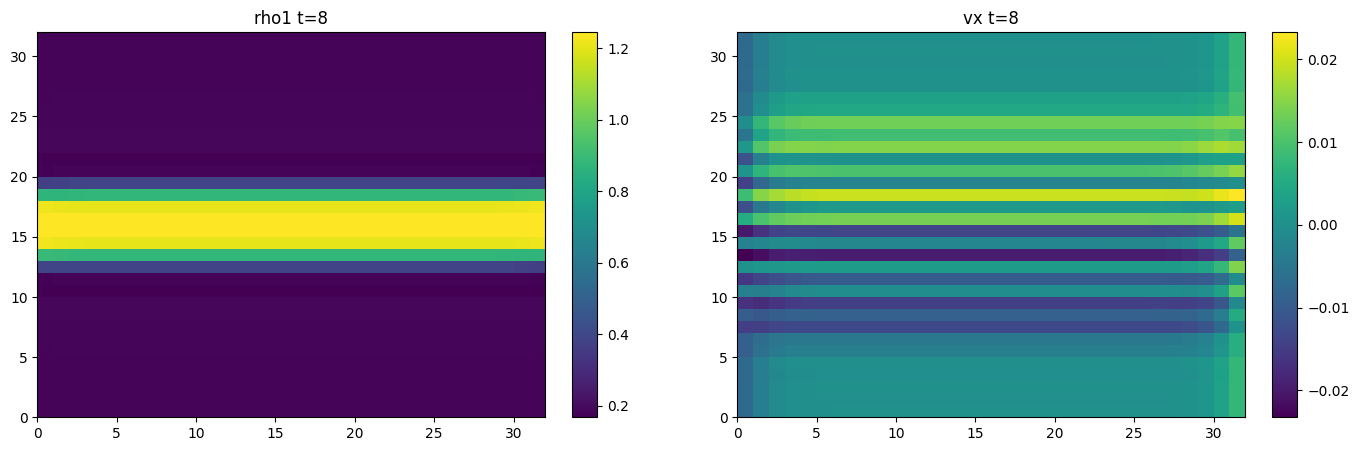

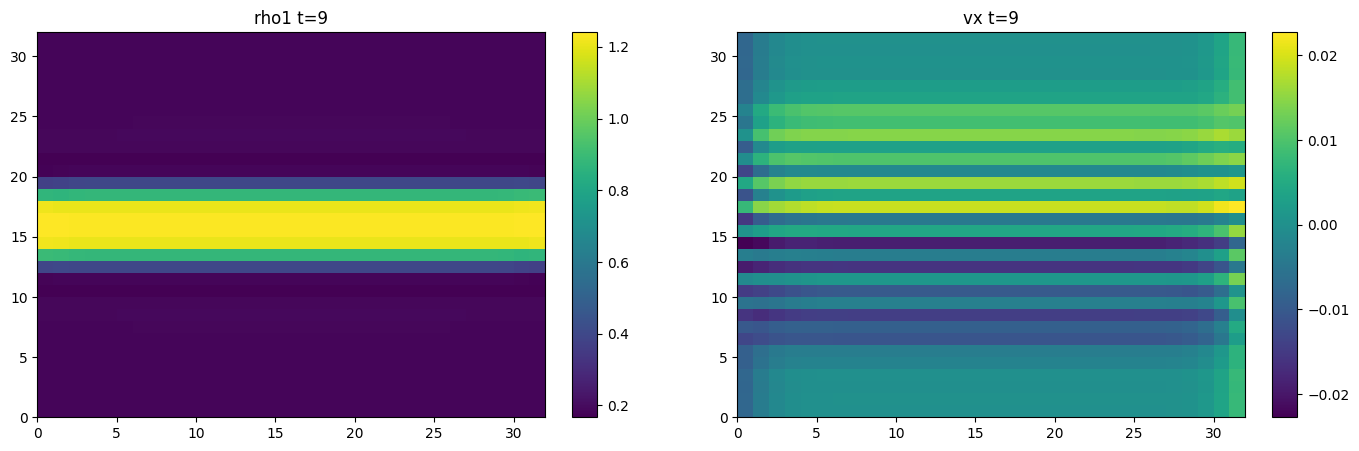

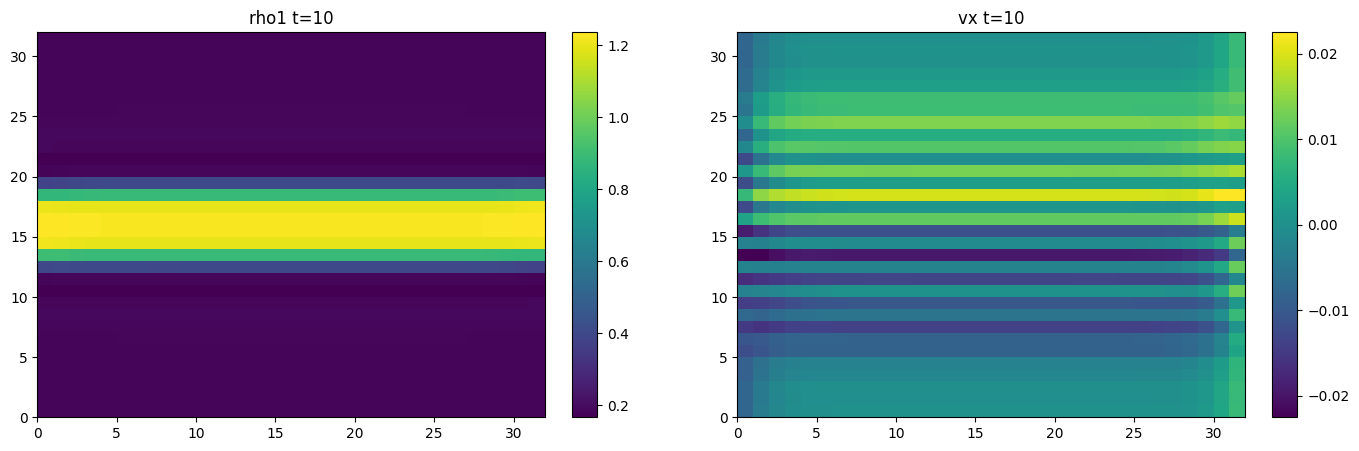

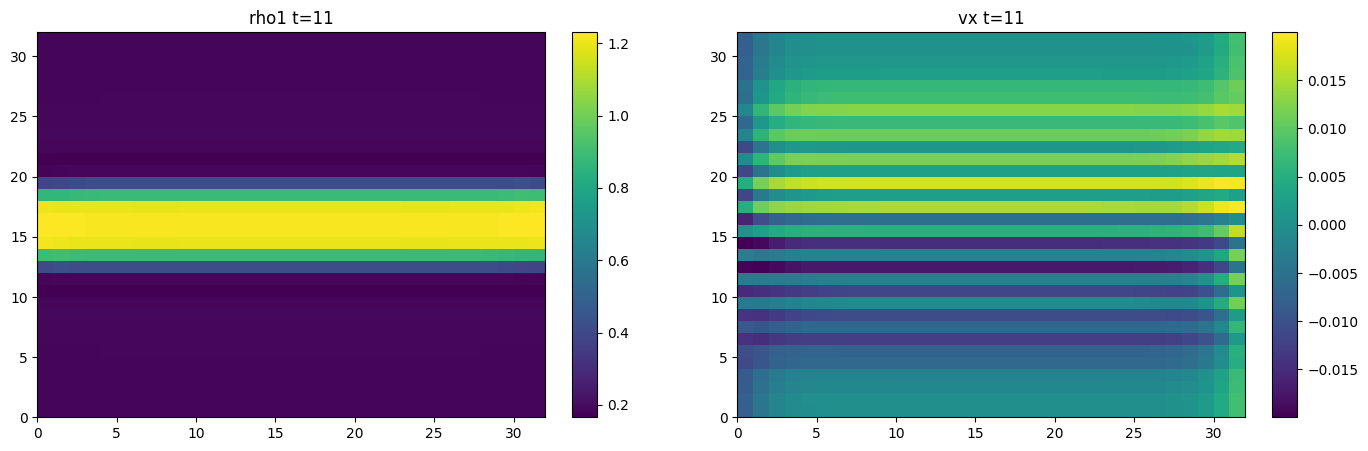

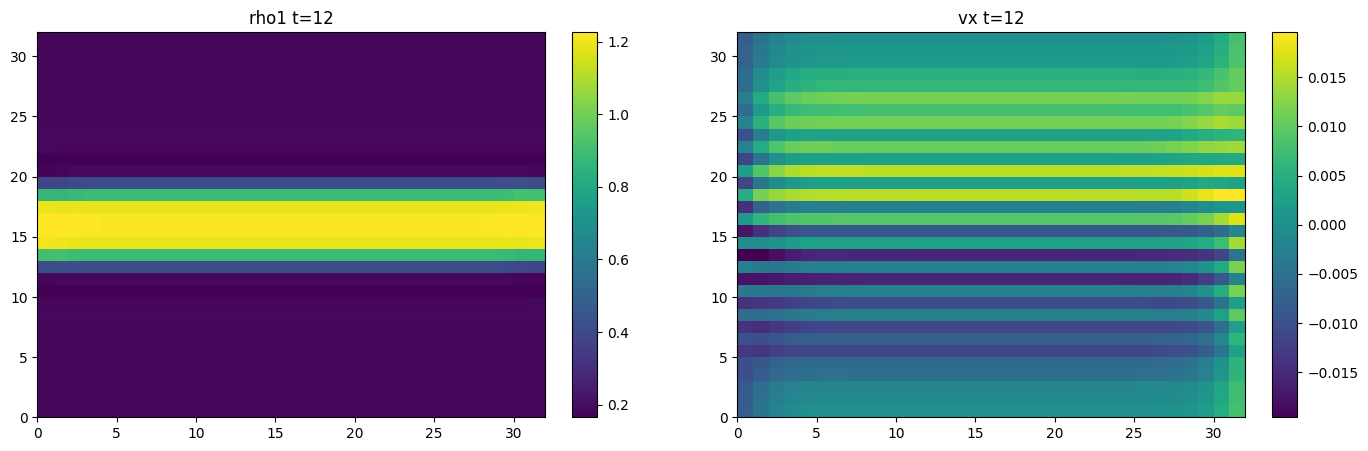

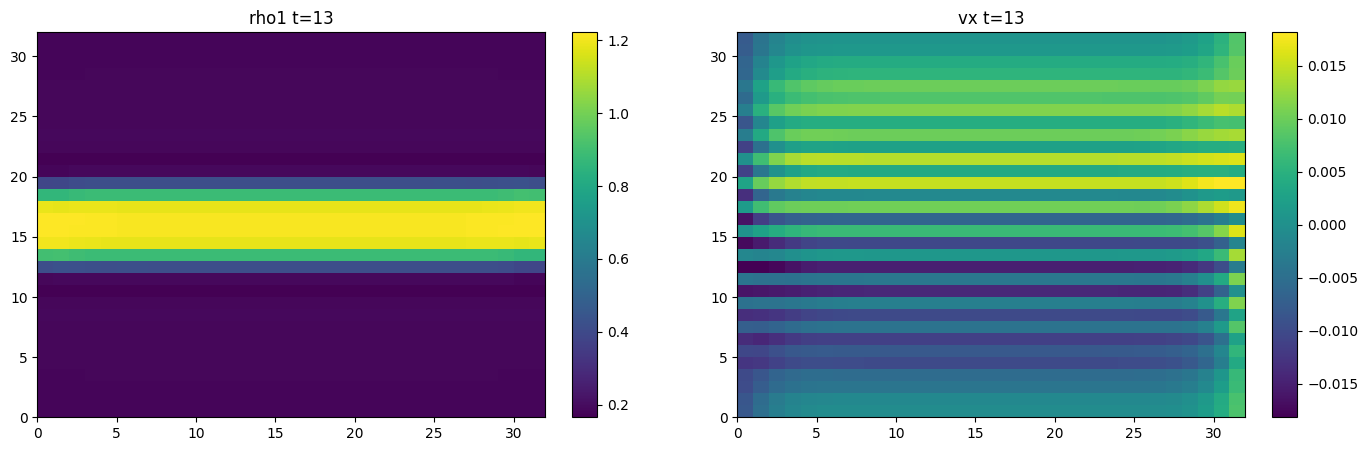

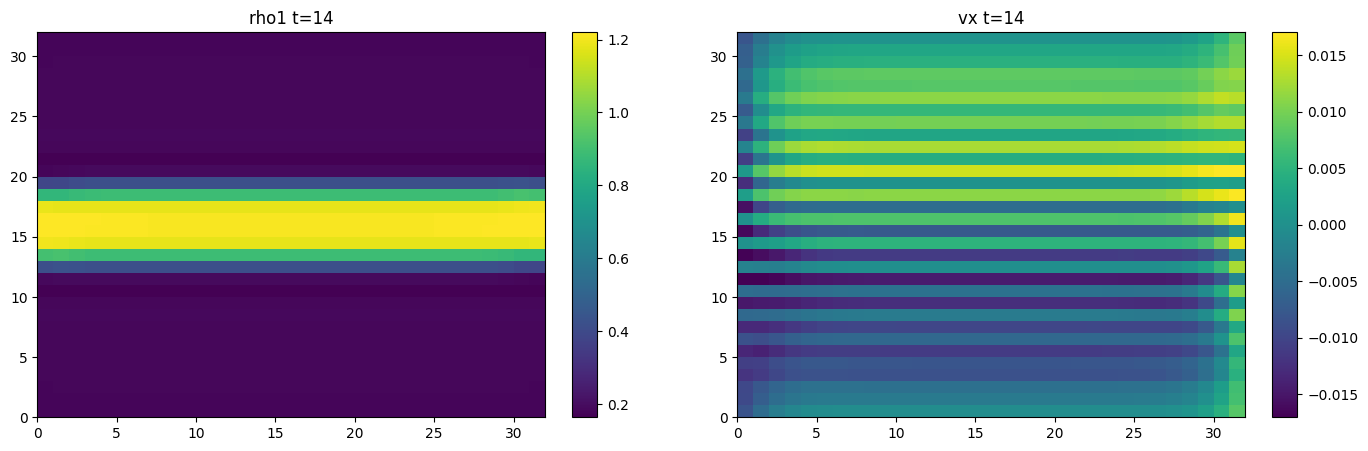

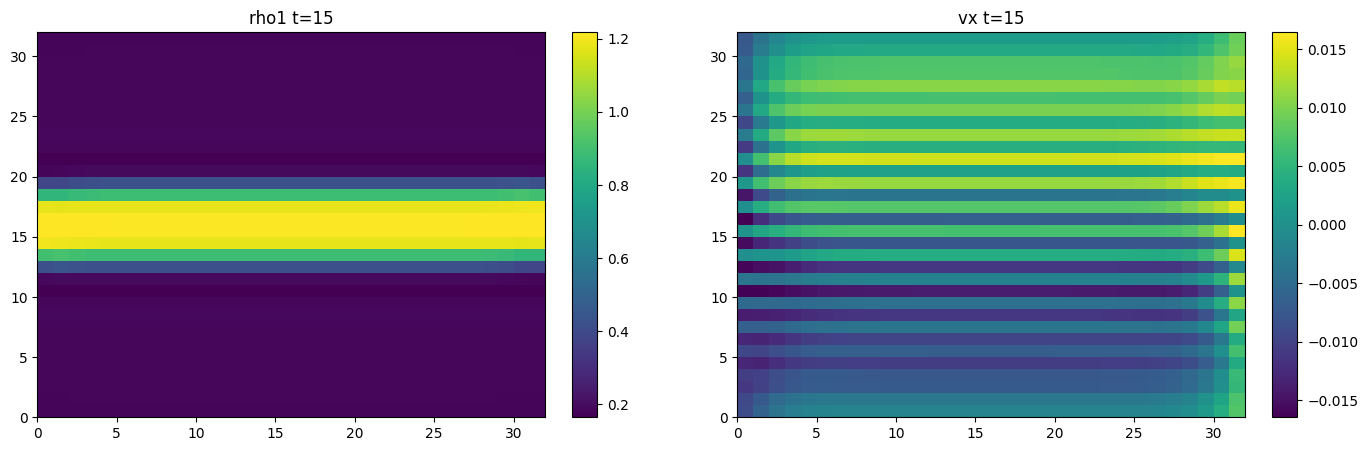

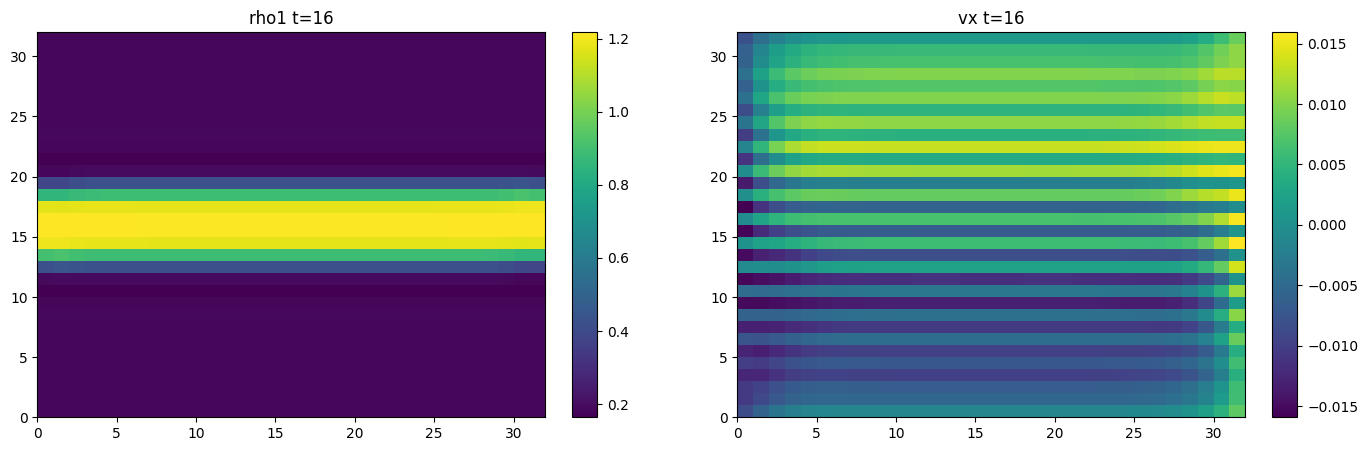

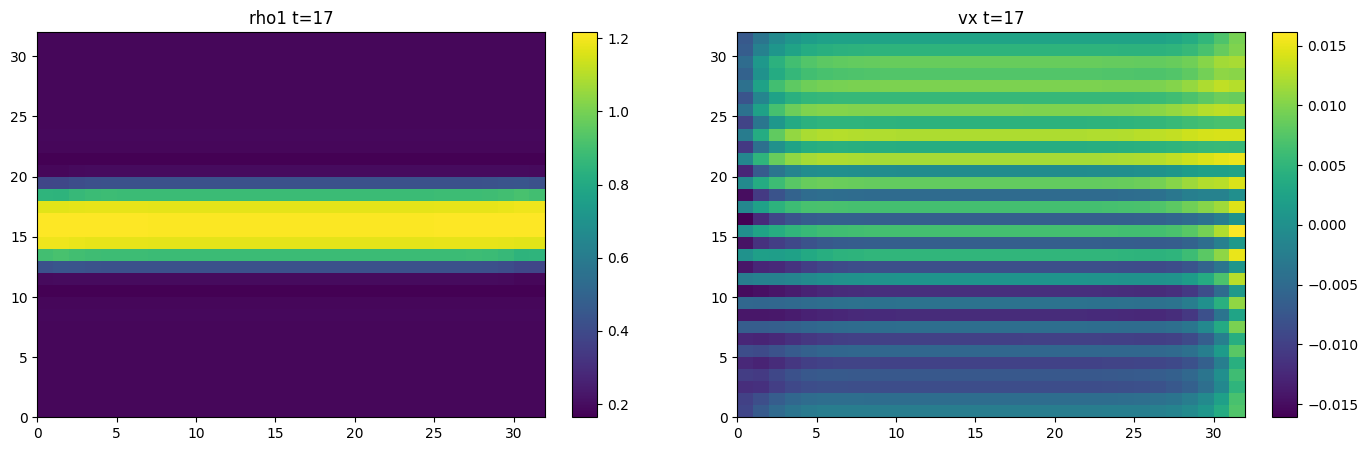

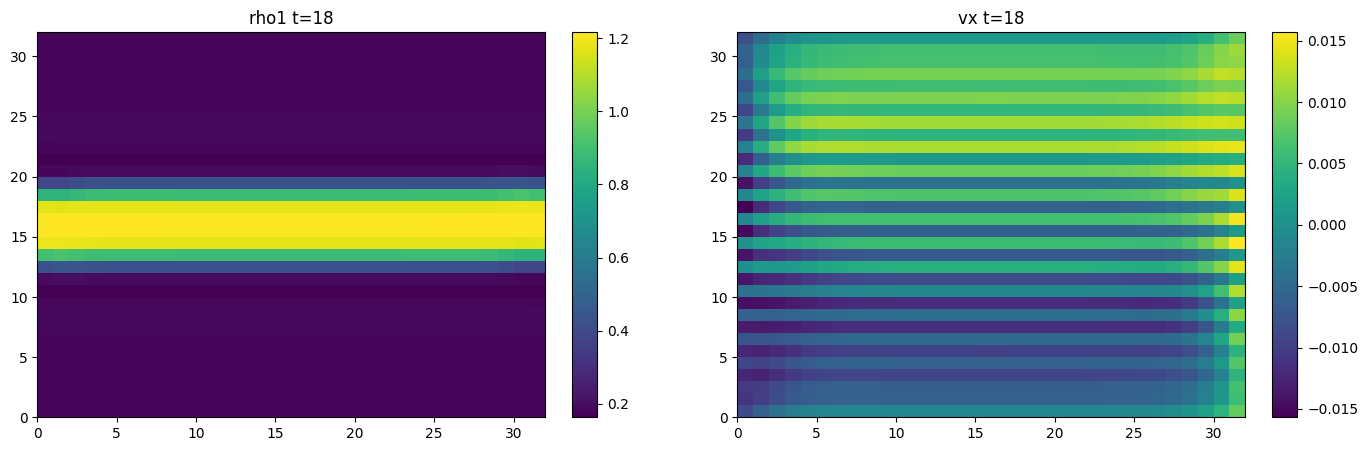

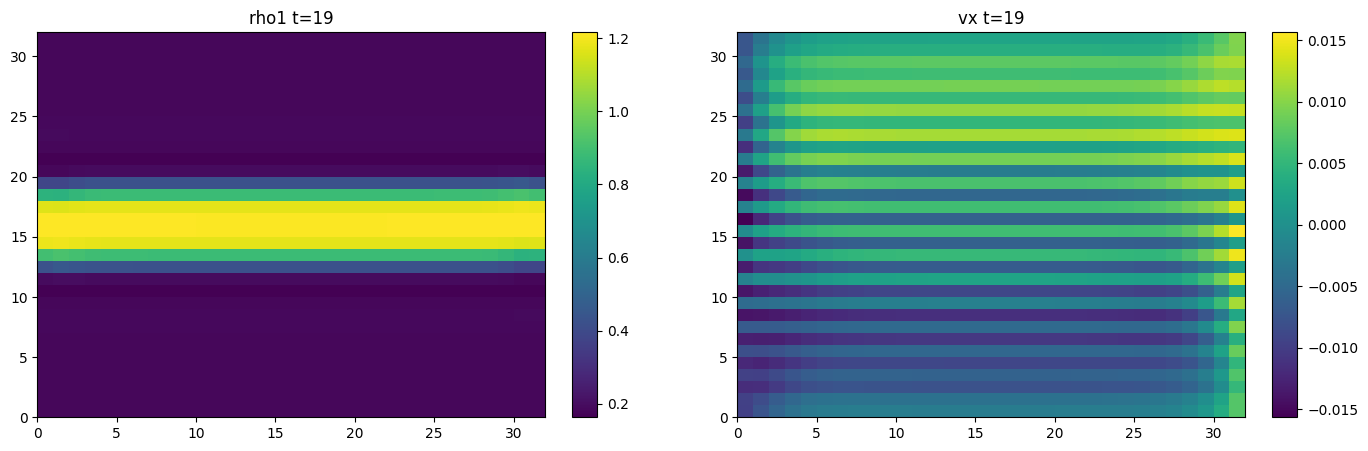

In [43]:
def plot_f(i, f, title):
    _ = plt.figure(i, figsize=[5,5])
    _ = plt.pcolormesh(f[:,:,10])
    _ = plt.colorbar()
    _ = plt.grid()
    _ = plt.xticks((np.linspace(0,Ny,Ny+1,dtype=np.int16)))
    _ = plt.yticks((np.linspace(0,Nx,Nx+1,dtype=np.int16)))
    _ = plt.title(title)

def plot_2f(f1, f2, i, title1, title2, vm, vM):
    n=1 ; COL=2 ; RIG=1 
    fig = plt.figure(i, figsize=[n*7*COL,n*5*RIG])
    gs1 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.05, right=0.45)#, hspace=0)
    axs1 = gs1.subplots()
    gs2 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.55, right=0.95)#, hspace=0)
    axs2 = gs2.subplots()
    vm = np.min(f1[:,cut,:]); vM = np.max(f1[:,cut,:])
    C = axs1[0].pcolormesh(f1[:,cut,:], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs1[0].set_title(title1)
    _ = matplotlib.colorbar.ColorbarBase(axs1[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    vm = np.min(f2[:,cut,:]); vM = np.max(f2[:,cut,:])
    C = axs2[0].pcolormesh(f2[:,cut,:], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs2[0].set_title(title2)
    _ = matplotlib.colorbar.ColorbarBase(axs2[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    if(SAVE):
        _ = plt.savefig(direc+str(i))
        _ = plt.close()

def plot_3f(f1, f2, f3, i, title1, title2, title3):
    n=1 ; COL=2 ; RIG=1
    fig = plt.figure(i, figsize=[n*8*COL,n*4.8*2*RIG])
    gs1 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.05, right=0.3)#, hspace=0)
    axs1 = gs1.subplots()
    gs2 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.37, right=0.63)#, hspace=0)
    axs2 = gs2.subplots()
    gs3 = fig.add_gridspec(RIG,COL,width_ratios=[1,0.05], wspace=0.1, left=0.7, right=0.95)#, hspace=0)
    axs3 = gs3.subplots()
    vm = np.min(f1[:,:,cut]); vM = np.max(f1[:,:,cut])
    C = axs1[0].pcolormesh(f1[:,:,cut], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs1[0].set_title(title1)
    _ = matplotlib.colorbar.ColorbarBase(axs1[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    vm = np.min(f2[:,:,cut]); vM = np.max(f2[:,:,cut])
    C = axs2[0].pcolormesh(f2[:,:,cut], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs2[0].set_title(title2)
    _ = matplotlib.colorbar.ColorbarBase(axs2[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)
    #vm = np.min(f3[:,:,cut]); vM = np.max(f3[:,:,cut])
    vm = -1; vM = +1
    C = axs3[0].pcolormesh(f3[:,:,cut], vmin=vm, vmax=vM, cmap="viridis")
    _ = axs3[0].set_title(title3)
    _ = matplotlib.colorbar.ColorbarBase(axs3[1], norm=matplotlib.colors.Normalize(vmin=vm, vmax=vM), cmap = C.cmap)

# plot_f(1,flaggeometry,"flaggeometry")
# plot_f(2,flag,"flag")
# plot_f(3,rhoN,"rhoN")
#plot_3f(flaggeometry, flag, rhoN0, 1, "flaggeometry", "flag", "rhoN0")
#plot_3f(rhoN0, rhoN1, rhoN2, 2, "rhoN t=0", "rhoN t=1", "rhoN t=2")

cut = 16
#minvalue = min( np.min(rho1[:,:,:,cut]), np.min(rho2[:,:,:,cut]) )
#maxvalue = max( np.max(rho1[:,:,:,cut]), np.max(rho2[:,:,:,cut]) )

for i in range(0,steps,1):
    #plot_f(i,rho1[i,:,:,:],"rho1 t=%d"%i*dt)
    plot_2f(rho1[i,:,:,:], vx[i,:,:,:], i, "rho1 t=%d"%(i*dt), "vx t=%d"%(i*dt), 0, 0)

In [ ]:
def plot_vprof(v,t,i):
    _ = plt.figure(i, figsize=[5,5])
    _ = plt.plot(v[t,16,16,:])

for i in range(0,steps):
    plot_vprof(vx, i, 0);

In [ ]:
filenames=[]
for i in range(steps):
    filenames.append(direc+str(i)+".png")

# with imageio.get_writer(savedir+"movie.gif", mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
        
images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(direc+'movie.gif',images,loop=0,duration=0.01)

In [ ]:
filenames=[]
for i in range(steps):
    filenames.append(direc+str(i)+".png")
for filename in filenames:
    os.remove(filename)